## Introduction
### Clustering Models work to group data points into clusters of similar characteristics.
![](images/hc1.jpg)
## How does the Hierarchical clustering Algorithm (`Agglomerative`) work ?
![](images/hc2.jpg)
### Typically uses the Euclidian distances to find the two closest clusters
![](images/hc3.jpg)
## Example
![](images/hc4.jpg)
## Step 1
![](images/hc5.jpg)
## Step 2
![](images/hc6.jpg)
## Step 3
![](images/hc7.jpg)
## Step 4
![](images/hc8.jpg)
## Step 5
![](images/hc9.jpg)
## The HC model keeps a memory of this process by creating a `Dendrogram`.
### Watch this video on how Dendrograms work : https://www.udemy.com/course/machinelearning/learn/lecture/5714432#content
## How the Dendrograms choose the appropriate clusters..
### Watch this video here : https://www.udemy.com/course/machinelearning/learn/lecture/5714438#content

## Objective
### Finding meaningful patterns in data.
**There is no ground truth / labelled data to learn from**

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

## Importing the data

In [2]:
data = pd.read_csv('data/Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### We will be using only 2 features to cluster the customers by. (Annual Income & Spending Score)

In [3]:
X = data.iloc[:, [3, 4]].values

In [4]:
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

## Finding the optimal # of clusters
### Using the Dendrograms

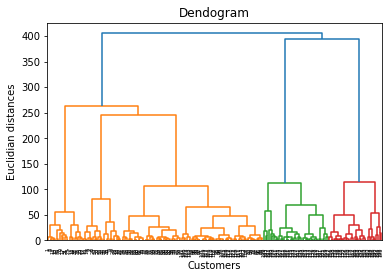

In [6]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidian distances')
plt.show();

### From the Dendrogram above , the optimal # of clusters = 5

## Training an Agglomerative HC model on the dataset

In [8]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [9]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

## Visualising the clusters

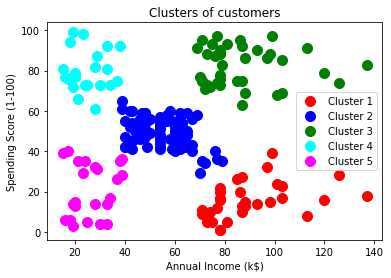

In [11]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show();